# 1. INTRODUCTION
Artificial intelligence (AI) is the field of computer science concerned with building smart machines capable of performing tasks that normally would require human intelligence. It is an interdisciplinary field with multiple approaches. Machine Learning (ML) being a subset of AI focuses on algorithms capable of learning from a set of observed data and decide or classify a task with little or no human supervision. The concept of ML is based on models receiving input data (e.g., text or images) and predicting outcomes. Statistical analysis and mathematical optimization work in the background of these models to reduce errors and ensure accurate predictions.

Application of AI in medicine is rapidly developing. AI can be used to hasten diagnosis to save medical practitioners time so they can focus on other important tasks. This report explores how various ML algorithms were used to predict if a patient has a cardio-vascular disease or not, based on some predictors. The project follows basic data science workflow which includes;
•	Data Collection

•	Data Pre-processing

•	Exploratory Data Analysis

•	Modelling

•	Evaluation

# 2. TASK
Given the dataset, build a prediction model that can tell if a patient has a heart disease or not.

## 2.1 FEATURED ATTRIBUTES
1. id: Numeric identifier
2. age: Patient age in days
3. height: Patient height in cm
4. weight: Patient weight in kg
5. gender: Patient gender, 1 = male, 2 = female
6. ap_hi: Systolic blood pressure, taken under observation
7. ap_lo: Diastolic blood pressure, taken under observation
8. cholesterol: Level of cholesterol, 1 = normal, 2 = above normal, 3 = high
9. gluc: Blood glucose level, 1 = normal, 2 = above normal = 3 = high
10. smoke: Smoker? 1 = Yes, 0 = No
11. alco: Does the patient drink alcohol? 1 = Yes, 0 = No
12. active: Level of physical activity engaged in. 0 = none or little, 1 = some or a lot
13. disease: Does the patient have cardiovascular disease? 0 = No, 1 = Yes

# 3. TOOLS USED
R programming language was the only programming language used throughout the lifecycle of the project. Some R libraries used are:
• Dplyr: This library was used for data manipulation.

• GGplot2: Excellent for data visualization.

• Performance Analytics: It was used for creating detailed correlation matrix.

• randomForest: This library was used to implement the random forest algorithm.

• Caret: Although very robust for building machine learning models. It was only used in this project to build confusion matrix.

• Xgboost: short for eXtreme Gradient Boosting, It was used to build gradient boosting algorithms.

• e1071:  It was used to build SVM model.


# 4.DATA IMPORTATION 

In [1]:
library(dplyr)

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [2]:
# Import data
df = read.csv(file.choose(), header = T)

In [4]:
head(df,12) # View the first 12 records

id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,disease
0,18393,2,168,62,110,80,1,1,0,0,1,0
1,20228,1,156,85,140,90,3,1,0,0,1,1
2,18857,1,165,64,130,70,3,1,0,0,0,1
3,17623,2,169,82,150,100,1,1,0,0,1,1
4,17474,1,156,56,100,60,1,1,0,0,0,0
8,21914,1,151,67,120,80,2,2,0,0,0,0
9,22113,1,157,93,130,80,3,1,0,0,1,0
12,22584,2,178,95,130,90,3,3,0,0,1,1
13,17668,1,158,71,110,70,1,1,0,0,1,0
14,19834,1,164,68,110,60,1,1,0,0,0,0


In [5]:
# Check the structure of the data
str(df)

'data.frame':	70000 obs. of  13 variables:
 $ id         : int  0 1 2 3 4 8 9 12 13 14 ...
 $ age        : int  18393 20228 18857 17623 17474 21914 22113 22584 17668 19834 ...
 $ gender     : int  2 1 1 2 1 1 1 2 1 1 ...
 $ height     : int  168 156 165 169 156 151 157 178 158 164 ...
 $ weight     : num  62 85 64 82 56 67 93 95 71 68 ...
 $ ap_hi      : int  110 140 130 150 100 120 130 130 110 110 ...
 $ ap_lo      : int  80 90 70 100 60 80 80 90 70 60 ...
 $ cholesterol: int  1 3 3 1 1 2 3 3 1 1 ...
 $ gluc       : int  1 1 1 1 1 2 1 3 1 1 ...
 $ smoke      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ alco       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ active     : int  1 1 0 1 0 0 1 1 1 0 ...
 $ disease    : int  0 1 1 1 0 0 0 1 0 0 ...


In [6]:
# check shape of data
dim(df)

[1] 70000    13

There are 70,000 records with 13 attributes(columns).

# 5 DATA PRE-PROCESSING

In [7]:
#check for missing data
sum(is.na(df))

[1] 0

In [8]:
# Check for outliers in data
summary(df)

       id             age            gender         height     
 Min.   :    0   Min.   :10798   Min.   :1.00   Min.   : 55.0  
 1st Qu.:25007   1st Qu.:17664   1st Qu.:1.00   1st Qu.:159.0  
 Median :50002   Median :19703   Median :1.00   Median :165.0  
 Mean   :49972   Mean   :19469   Mean   :1.35   Mean   :164.4  
 3rd Qu.:74889   3rd Qu.:21327   3rd Qu.:2.00   3rd Qu.:170.0  
 Max.   :99999   Max.   :23713   Max.   :2.00   Max.   :250.0  
     weight           ap_hi             ap_lo           cholesterol   
 Min.   : 10.00   Min.   : -150.0   Min.   :  -70.00   Min.   :1.000  
 1st Qu.: 65.00   1st Qu.:  120.0   1st Qu.:   80.00   1st Qu.:1.000  
 Median : 72.00   Median :  120.0   Median :   80.00   Median :1.000  
 Mean   : 74.21   Mean   :  128.8   Mean   :   96.63   Mean   :1.367  
 3rd Qu.: 82.00   3rd Qu.:  140.0   3rd Qu.:   90.00   3rd Qu.:2.000  
 Max.   :200.00   Max.   :16020.0   Max.   :11000.00   Max.   :3.000  
      gluc           smoke              alco           

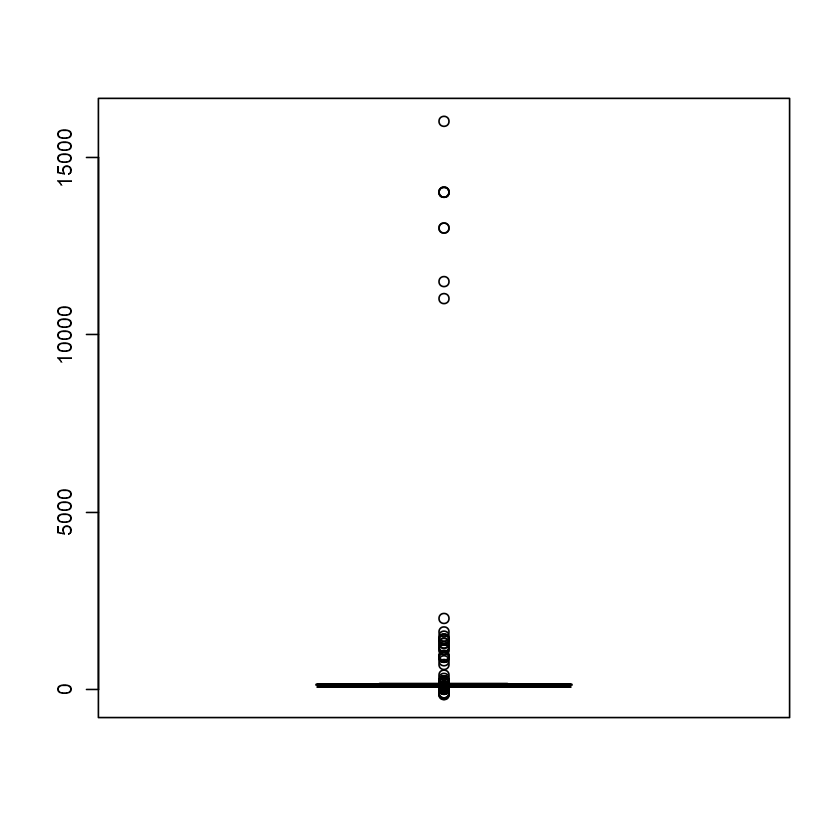

In [9]:
# A closer look at Systolic Blood Pressure
boxplot(df$ap_hi) #boxplot

In [10]:
# filter and sort Systolic blood pressure less than zero
df %>% filter(ap_hi <0) %>% arrange(desc(ap_hi))#Systolic Blood Pressure BELOW 0

id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,disease
6525,15281,1,165,78,-100,80,2,1,0,0,1,0
29313,15581,1,153,54,-100,70,1,1,0,0,1,0
22881,22108,2,161,90,-115,70,1,1,0,0,1,0
36025,14711,2,168,50,-120,80,2,1,0,0,0,1
66571,23646,2,160,59,-120,80,1,1,0,0,0,0
34295,18301,1,162,74,-140,90,1,1,0,0,1,1
50055,23325,2,168,59,-150,80,1,1,0,0,1,1


In [11]:
df %>% filter(ap_hi > 250) %>% arrange(desc(ap_hi)) %>% count() #Systolic Blood Pressure count ABOVE 250

n
40


In [12]:
# Filter and sort diastolic blood pressure less than zero
df %>% filter(ap_lo <0) %>% arrange(desc(ap_lo)) #Diastolic Blood Pressure BELOW 0

id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,disease
85816,22571,1,167,74,15,-70,1,1,0,0,1,1


In [13]:
df %>% filter(ap_lo > 150) %>% arrange(desc(ap_lo)) %>% count() #Diastolic Blood Pressure count ABOVE 150

n
975


In [14]:
# Impute absolute values for negative diastoic and systolic blood pressure
abs_val <- function(x){ #create function to change negative values to positive
    if (x<0 | x>0){
        abs(x)
    }
}

In [15]:
## apply function to ap_hi and ap_lo
df[,c(6,7)] <- apply(df[,c(6,7)], 2, abs_val)

Warning message in if (x < 0 | x > 0) {:
"the condition has length > 1 and only the first element will be used"Warning message in if (x < 0 | x > 0) {:
"the condition has length > 1 and only the first element will be used"

In [16]:
## Check if the negative values still exist

subset(df, df$ap_lo <0 | df$ap_hi < 0)

id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,disease


In [17]:
df_backup <- df #backup dataset

In [18]:
# remove systolic values above 250
df <- df %>% filter(ap_hi <=250)

In [19]:
# remove diastolic values above 150
df <- df %>% filter(ap_lo <= 150)

The provided data is a secondary data hence it is expected to have minimal error. However, the reverse is the case. A simple summary statistics (table 1) revealed massive outliers found in some of the variables. Data cleaning and transformations still needed to be carried out on the given dataset, variables like ap_hi and ap_lo had minimum values of -150 and -70 respectively, and maximum values of 16020 and 11000, perceived to be present as a result of wrong data input. These values are however impossible in the real world. In order to improve the signal to noise ratio of the data, the most reasonable option was to convert negative values to their absolute forms and drop the records with ap_hi value above and 250 and ap_lo value above 150. These thresholds were considered after consulting with experts in the medical field. The dataset was further checked for missing values, fortunately there was no missing value. 

In [20]:
summary(df)

       id             age            gender          height     
 Min.   :    0   Min.   :10798   Min.   :1.000   Min.   : 55.0  
 1st Qu.:24996   1st Qu.:17656   1st Qu.:1.000   1st Qu.:159.0  
 Median :50004   Median :19700   Median :1.000   Median :165.0  
 Mean   :49966   Mean   :19464   Mean   :1.349   Mean   :164.4  
 3rd Qu.:74859   3rd Qu.:21323   3rd Qu.:2.000   3rd Qu.:170.0  
 Max.   :99999   Max.   :23713   Max.   :2.000   Max.   :250.0  
     weight           ap_hi           ap_lo         cholesterol   
 Min.   : 11.00   Min.   :  7.0   Min.   :  0.00   Min.   :1.000  
 1st Qu.: 65.00   1st Qu.:120.0   1st Qu.: 80.00   1st Qu.:1.000  
 Median : 72.00   Median :120.0   Median : 80.00   Median :1.000  
 Mean   : 74.12   Mean   :126.3   Mean   : 81.31   Mean   :1.364  
 3rd Qu.: 82.00   3rd Qu.:140.0   3rd Qu.: 90.00   3rd Qu.:1.000  
 Max.   :200.00   Max.   :240.0   Max.   :150.00   Max.   :3.000  
      gluc           smoke              alco             active      
 Min. 

After cleaning the data, another summary statistics was run to ensure that the dataset was ready to be used in Exploratory Data Analysis. 

In [21]:
dim(df)

[1] 68985    13

# 6 EXPLORATORY DATA ANALYSIS (EDA)
After cleaning the dataset, the observations reduced from 70,000 to 68,985. I started the EDA by comparing the number of patients with and without heart diseases.

In [22]:
# Exploratory Data Analysis
## check the proportion of disease
table(df$disease)


    0     1 
34854 34131 

In [23]:
prop.table(table(df$disease))*100


       0        1 
50.52403 49.47597 

The analysis revealed the dataset is balanced with approximately 50% for each case.

In [24]:
# Compare the proportion of disease across ages
## Create a new column for age(year)
df$age_year <- floor(df$age/365)

I created a column that converted the ages of the patients from days to years. This was done in order to compare the age distribution of patients with and without a cardio-vascular disease.

In [25]:
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

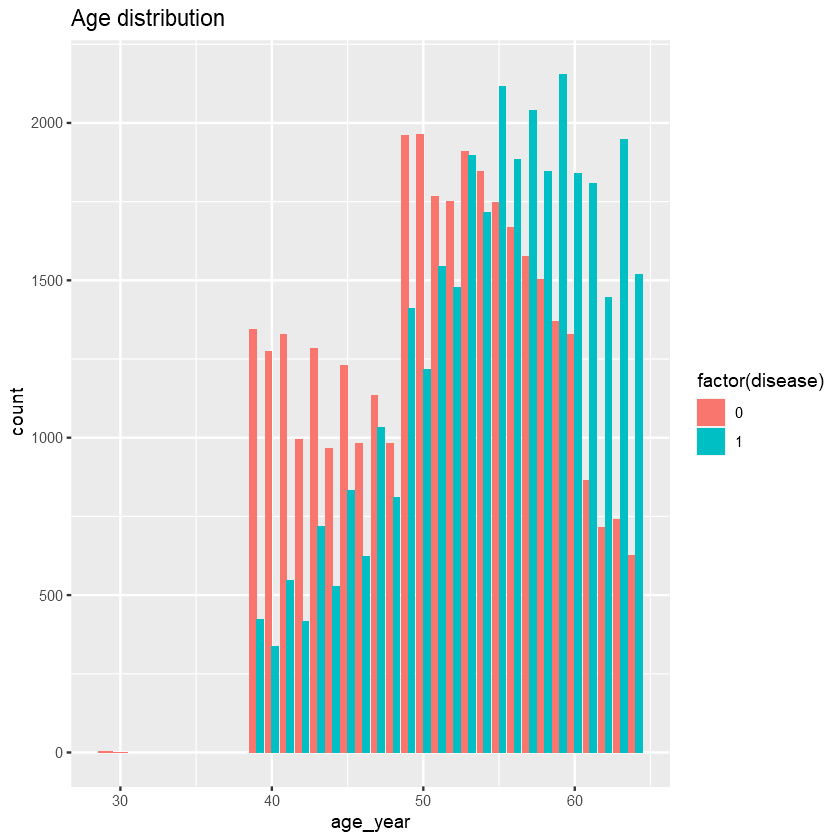

In [26]:
ggplot(df) + geom_bar(aes(x = age_year, fill = factor(disease)), position = 'dodge') + ggtitle("Age distribution")

There are more patients with heart diseases than those without from age 53 and above.

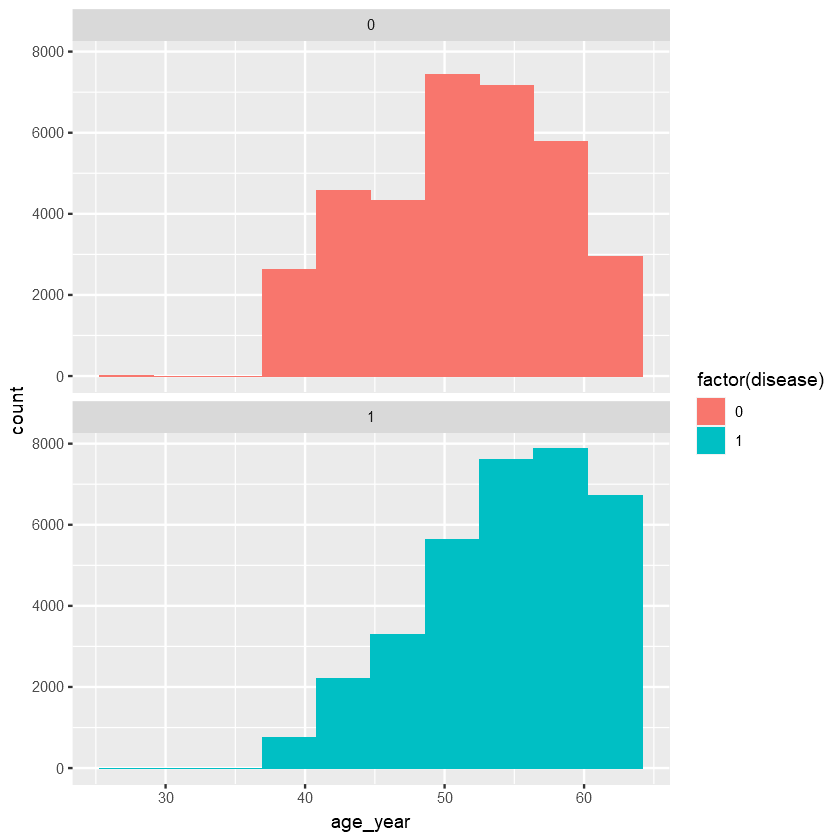

In [27]:
## Age Distribution of those with heart disease and those without 
 ggplot(df, aes(x = age_year, fill = factor(disease)))  + geom_histogram(bins = 10) + facet_wrap(~ factor(disease), nrow = 2)

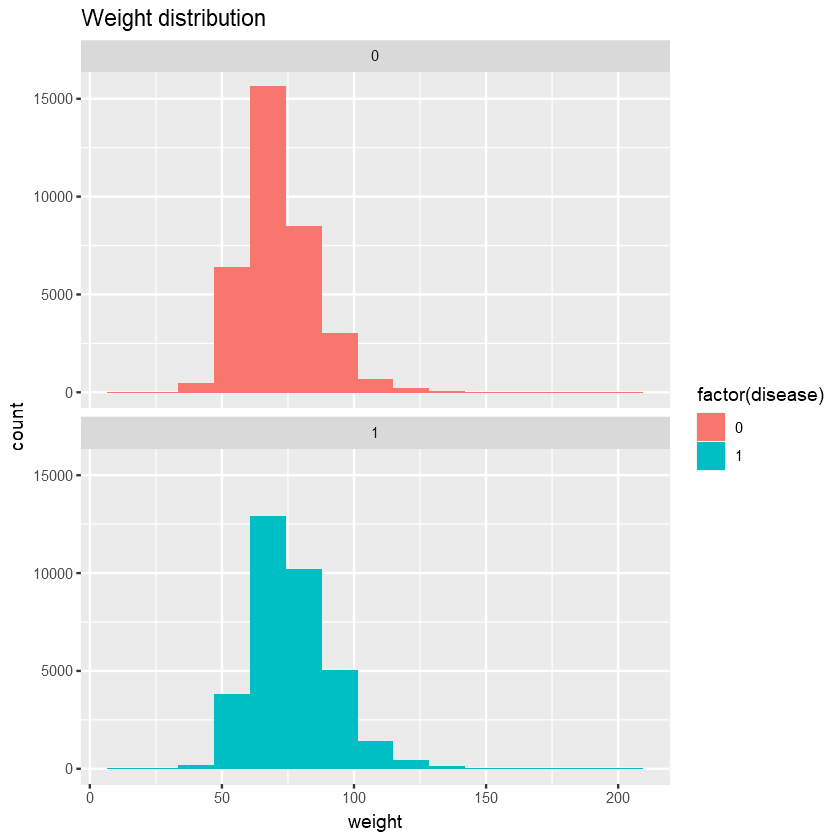

In [28]:
## weight Distribution of those with heart disease and those without 
 ggplot(df, aes(x = weight, fill = factor(disease)))  + geom_histogram(bins = 15) + facet_wrap(~ factor(disease), nrow = 2)  + ggtitle("Weight distribution")

The weight distribution is right skew for both patients with and without heart disease with a median of about 72 kg.

### Do men have more heart diseases than women?

In [29]:
## filter only records with heart diseases
df_yes <- df%>%filter(disease == 1)

In [30]:
prop.table(table(df$gender))*100


       1        2 
65.12285 34.87715 

In [31]:
table(df_yes$gender) #male = 1, female = 2


    1     2 
22103 12028 

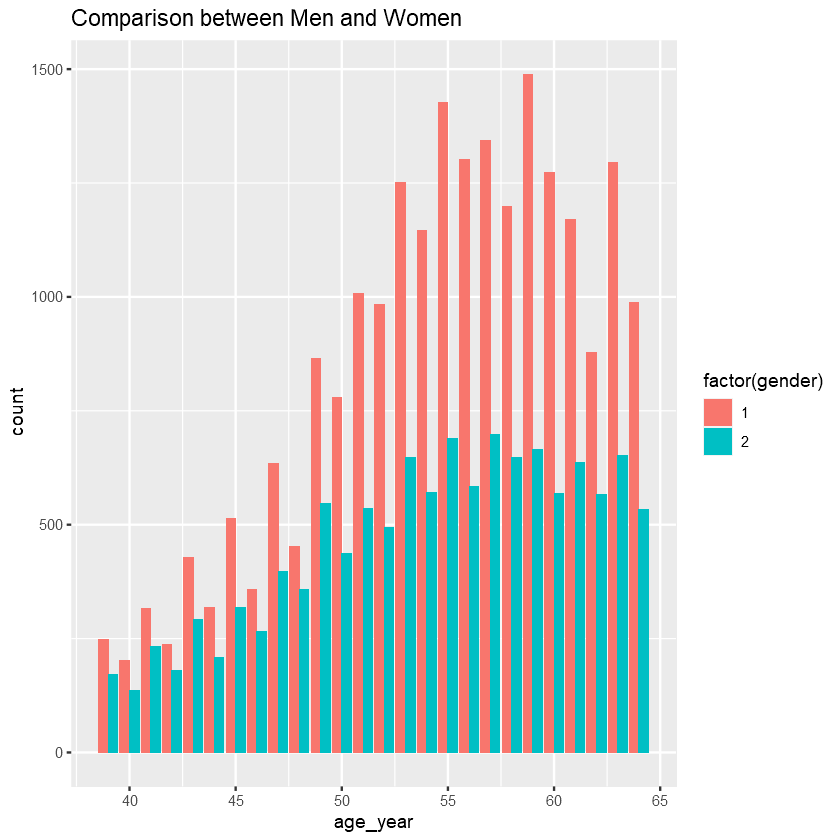

In [32]:
ggplot(df_yes) + geom_bar(aes(x = age_year, fill = factor(gender)), position = 'dodge')  + ggtitle("Comparison between Men and Women")

From the data sample provided, there were more men than women across all ages with heart diseases. This is expected as the entire dataset has about 30% more men than women. 

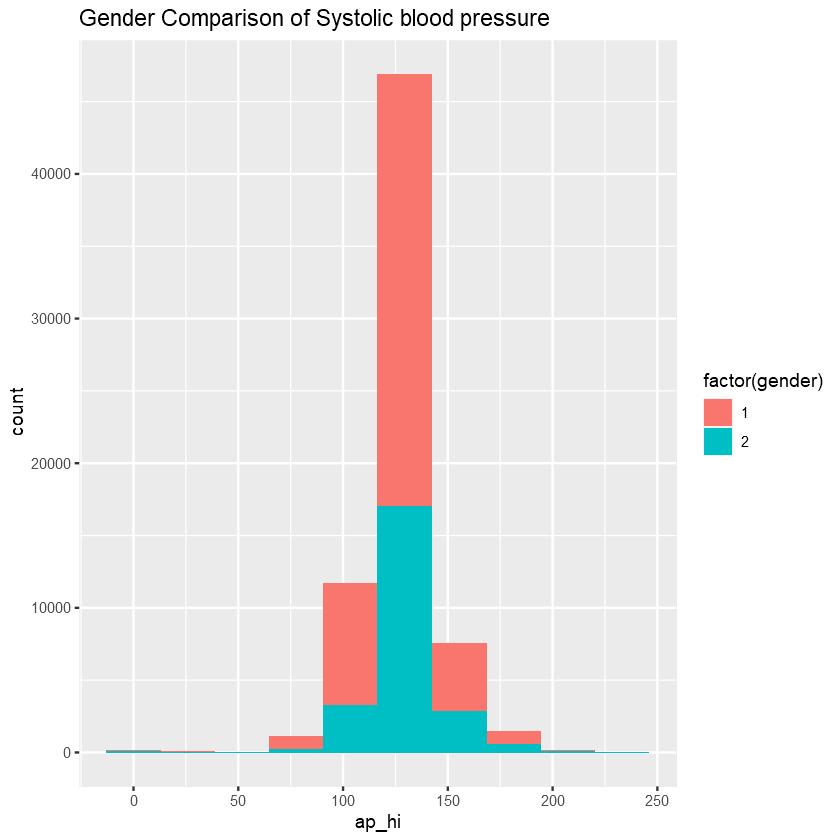

In [33]:
# Check the distribution of both blood pressures
## histogram for systolic blood pressure (ap_hi) for those with and without heart disease
ggplot(df) + geom_histogram(aes(x = ap_hi, fill = factor(gender)), bins = 10)  + ggtitle("Gender Comparison of Systolic blood pressure")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


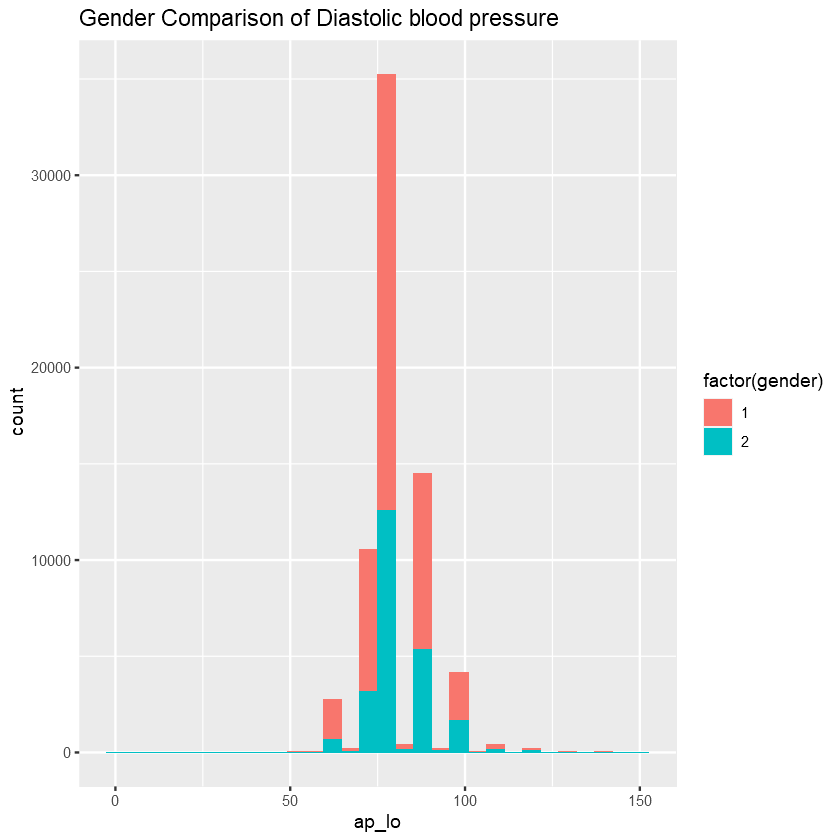

In [34]:
## histogram for diastolic blood pressure (ap_lo) for those with and without heart disease
ggplot(df) + geom_histogram(aes(x = ap_lo, fill = factor(gender))) + ggtitle("Gender Comparison of Diastolic blood pressure")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


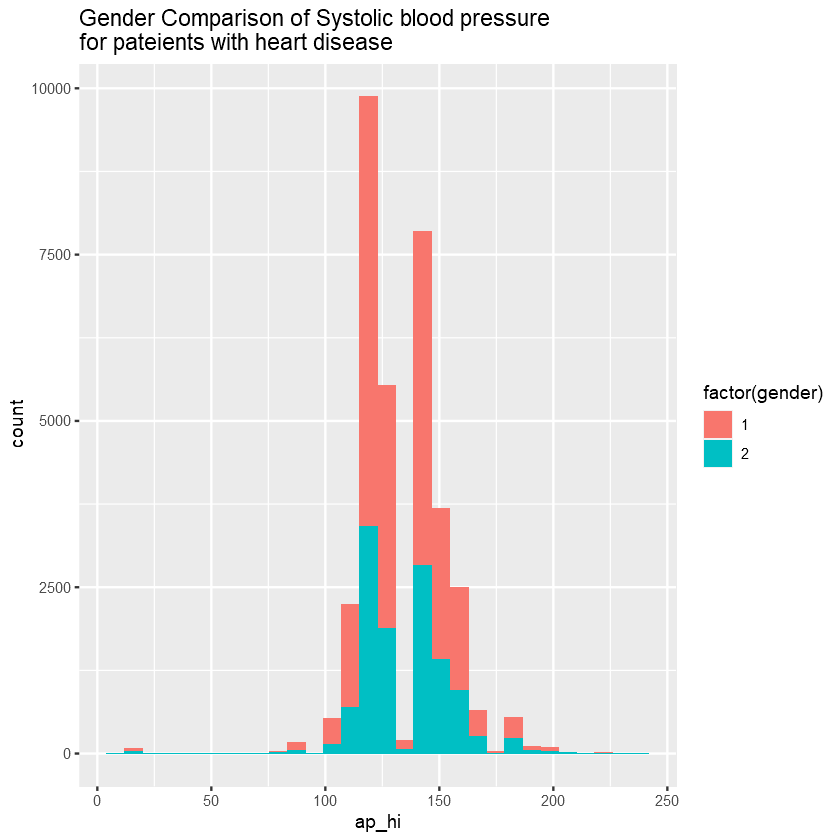

In [35]:
## histogram for systolic blood pressure (ap_hi) for those with heart disease
ggplot(df_yes) + geom_histogram(aes(x = ap_hi, fill = factor(gender))) + ggtitle("Gender Comparison of Systolic blood pressure \nfor pateients with heart disease")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


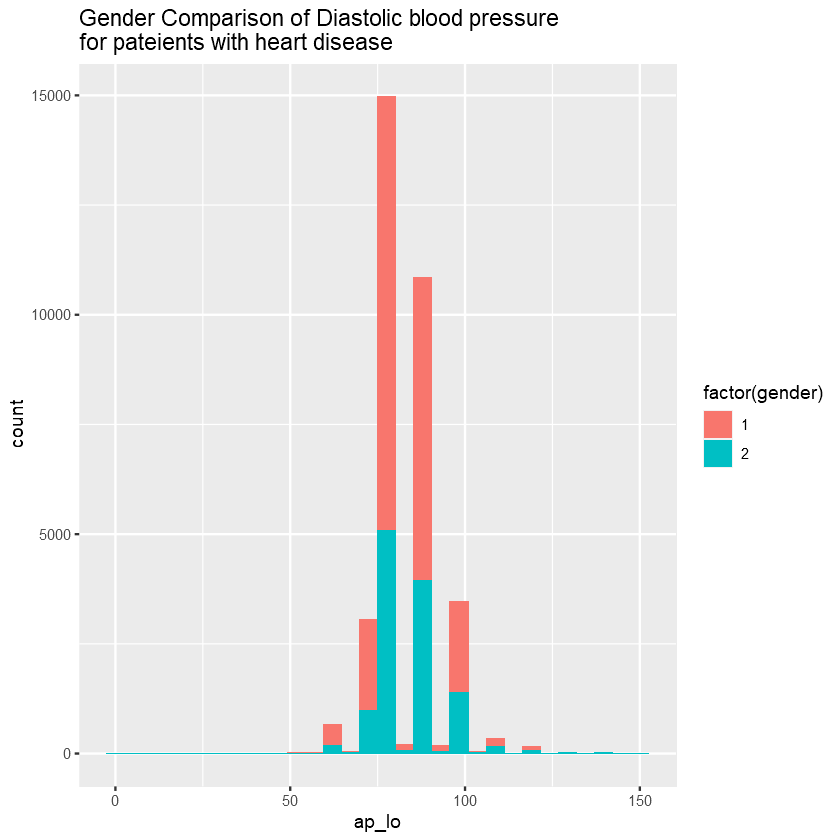

In [36]:
## histogram for diastolic blood pressure (ap_lo) for those with heart disease
ggplot(df_yes) + geom_histogram(aes(x = ap_lo, fill = factor(gender))) + ggtitle("Gender Comparison of Diastolic blood pressure \nfor pateients with heart disease")

### What proportion of smokers have heart disease?

In [37]:
df_smokers <- df %>% filter(smoke == 1)

In [38]:
prop.table(table(df_smokers$disease))*100


       0        1 
53.14201 46.85799 

About 46.86% has heart diseases

### What proportion of drinkers don't have heart disease?

In [39]:
## How many drinkers have heart disease?
df_drinker <- df %>% filter(alco == 1)

In [40]:
prop.table(table(df_drinker$disease))*100


       0        1 
52.30228 47.69772 

About 52.3% don't have heart diseases

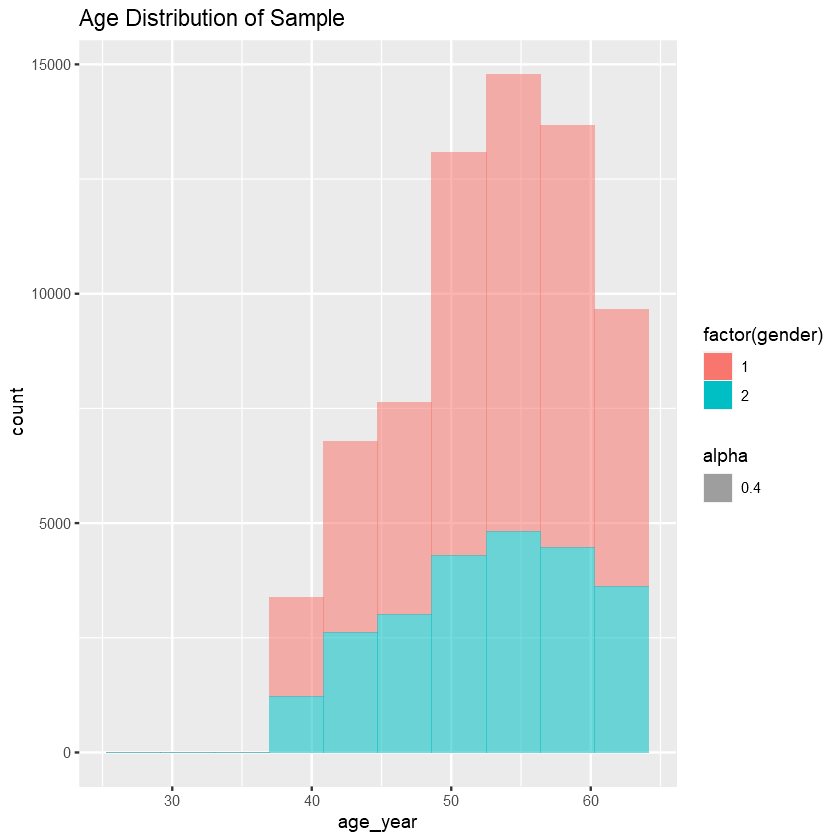

In [41]:
## Age distribution
ggplot(df) + geom_histogram(aes(x = age_year, fill = factor(gender), alpha = 0.4), bins = 10) + ggtitle("Age Distribution of Sample")

In [42]:
# create a correlation matrix
library(PerformanceAnalytics) 

Warning message:
"package 'PerformanceAnalytics' was built under R version 3.6.3"Loading required package: xts
Warning message:
"package 'xts' was built under R version 3.6.3"Loading required package: zoo
Warning message:
"package 'zoo' was built under R version 3.6.3"
Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Attaching package: 'xts'

The following objects are masked from 'package:dplyr':

    first, last


Attaching package: 'PerformanceAnalytics'

The following object is masked from 'package:graphics':

    legend



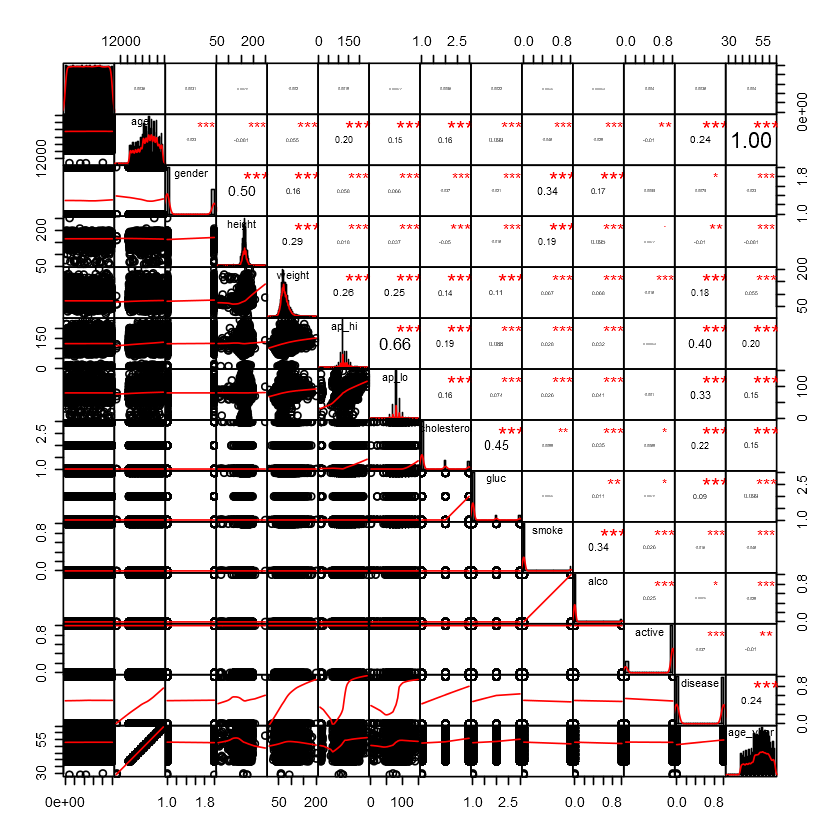

In [43]:
chart.Correlation(df, histogram = TRUE) 

Pearson correlation between two variables is a number that indicates how closely their relationship follows a straight line. A correlation matrix was created to check the linear relationship between variables found in the dataset. The bottom triangle of the plot shows the correlation plots of each pair of features. The correlation matrix shows that Systolic and Diastolic blood pressures have the highest correlation number of 0.66 which is a strong positive correlation between the two variables.

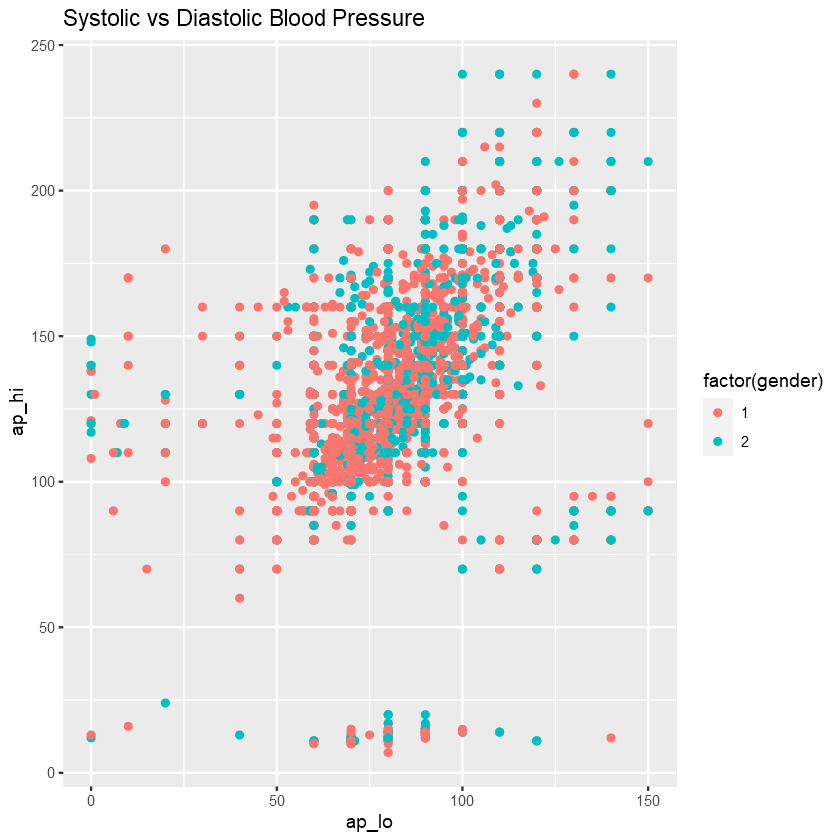

In [44]:
## Relationship between Systolic and Diastolic blood pressures
ggplot(df, aes(x = ap_lo, y = ap_hi, colour = factor(gender))) + geom_point() + ggtitle('Systolic vs Diastolic Blood Pressure')

In [45]:
cor(df$ap_hi, df$ap_lo)

[1] 0.6562216

To further examine the relationship between systolic and diastolic blood pressure, a scatter plot was created. The Systolic blood pressure (ap_hi) is plotted on the y-axis why the diastolic blood pressure (ap_lo) is plotted on the x-axis. 

# 7 PREDICTION MODEL
In order to develop a model that allows for prediction of potential heart disease for medical practitioners, different state-of-art machine learning algorithms were explored. Since the target variable has a binary outcome, I only focused on classifier algorithms. A classifier algorithm is a supervised machine learning algorithm that aims to predict the category or class a response variable belongs to, in this case, if a patient has heart disease or not. Other applications of classifier algorithms can be found in; email spam filtering, image recognition, sentiment analysis etc. The classifiers explored in this section include:
•	Random Forest

•	Logistic Regression

•	Support Vector Machine

•	Gradient boosting

•	Neural Net

•	K-Nearest Neighbor 

In [46]:
head(df)

id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,disease,age_year
0,18393,2,168,62,110,80,1,1,0,0,1,0,50
1,20228,1,156,85,140,90,3,1,0,0,1,1,55
2,18857,1,165,64,130,70,3,1,0,0,0,1,51
3,17623,2,169,82,150,100,1,1,0,0,1,1,48
4,17474,1,156,56,100,60,1,1,0,0,0,0,47
8,21914,1,151,67,120,80,2,2,0,0,0,0,60


In [47]:
## Remove the id and age_year column, since it was formed from the age column
df <- df[c(-1,-14)]

In [48]:
head(df)

age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,disease
18393,2,168,62,110,80,1,1,0,0,1,0
20228,1,156,85,140,90,3,1,0,0,1,1
18857,1,165,64,130,70,3,1,0,0,0,1
17623,2,169,82,150,100,1,1,0,0,1,1
17474,1,156,56,100,60,1,1,0,0,0,0
21914,1,151,67,120,80,2,2,0,0,0,0


In [49]:
## Take another backup
df_back2 <- df

In [50]:
## convert gender, cholesterol, gluc, smoke, alco, active and disease to factors
df[,c(2,7,8,9,10,11,12)] <- apply(df[,c(2,7,8,9,10,11,12)], 2, as.numeric)

In [51]:
df$gender <- factor(df$gender)
df$cholesterol <- factor(df$cholesterol)
df$gluc <- factor(df$gluc)
df$smoke <- factor(df$smoke)
df$alco <- factor(df$alco)
df$active <- factor(df$active)
df$disease <- factor(df$disease)

In [52]:
str(df)

'data.frame':	68985 obs. of  12 variables:
 $ age        : int  18393 20228 18857 17623 17474 21914 22113 22584 17668 19834 ...
 $ gender     : Factor w/ 2 levels "1","2": 2 1 1 2 1 1 1 2 1 1 ...
 $ height     : int  168 156 165 169 156 151 157 178 158 164 ...
 $ weight     : num  62 85 64 82 56 67 93 95 71 68 ...
 $ ap_hi      : int  110 140 130 150 100 120 130 130 110 110 ...
 $ ap_lo      : int  80 90 70 100 60 80 80 90 70 60 ...
 $ cholesterol: Factor w/ 3 levels "1","2","3": 1 3 3 1 1 2 3 3 1 1 ...
 $ gluc       : Factor w/ 3 levels "1","2","3": 1 1 1 1 1 2 1 3 1 1 ...
 $ smoke      : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ alco       : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ active     : Factor w/ 2 levels "0","1": 2 2 1 2 1 1 2 2 2 1 ...
 $ disease    : Factor w/ 2 levels "0","1": 1 2 2 2 1 1 1 2 1 1 ...


For the purpose of model building, the dataset was further transformed. The data type for the categorical variables was changed, in R this means I had to change from integer type to factor type variable. Unwanted variables like ID was removed because it had no statistical significance. 

In [53]:
## Normalize dataset
## create the scaling function
norm <- function(x){(x - min(x))/(max(x) - min(x))}

In [54]:
## split the dataset 80:20
set.seed(1234)
ind <- sample(1:nrow(df), size = 0.8*nrow(df))
trainset <- df[ind,]
testset <- df[-ind,]

The data was divided in such a way that 80% was used for model training and 20% for testing.

## 7.1 RANDOM FOREST
Random forest is a supervised learning algorithm that builds an ensemble of decision trees and aggregates its results. The trees are trained using bagging method, i.e. a combination of multiple decision trees aimed at yielding the overall best result. One of the biggest advantages of random forest is its ability to be used in classification and regression tasks. Secondly, random forest is less likely to cause overfitting when compared to decision trees. Another advantage of random forest is its simplicity of use. 

In [55]:
## Build model ith random forest
library(randomForest)

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:ggplot2':

    margin

The following object is masked from 'package:dplyr':

    combine



In [56]:
head(df)

age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,disease
18393,2,168,62,110,80,1,1,0,0,1,0
20228,1,156,85,140,90,3,1,0,0,1,1
18857,1,165,64,130,70,3,1,0,0,0,1
17623,2,169,82,150,100,1,1,0,0,1,1
17474,1,156,56,100,60,1,1,0,0,0,0
21914,1,151,67,120,80,2,2,0,0,0,0


In [57]:
str(df)

'data.frame':	68985 obs. of  12 variables:
 $ age        : int  18393 20228 18857 17623 17474 21914 22113 22584 17668 19834 ...
 $ gender     : Factor w/ 2 levels "1","2": 2 1 1 2 1 1 1 2 1 1 ...
 $ height     : int  168 156 165 169 156 151 157 178 158 164 ...
 $ weight     : num  62 85 64 82 56 67 93 95 71 68 ...
 $ ap_hi      : int  110 140 130 150 100 120 130 130 110 110 ...
 $ ap_lo      : int  80 90 70 100 60 80 80 90 70 60 ...
 $ cholesterol: Factor w/ 3 levels "1","2","3": 1 3 3 1 1 2 3 3 1 1 ...
 $ gluc       : Factor w/ 3 levels "1","2","3": 1 1 1 1 1 2 1 3 1 1 ...
 $ smoke      : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ alco       : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ active     : Factor w/ 2 levels "0","1": 2 2 1 2 1 1 2 2 2 1 ...
 $ disease    : Factor w/ 2 levels "0","1": 1 2 2 2 1 1 1 2 1 1 ...


In [58]:
dim(testset)
dim(trainset)

[1] 13797    12

[1] 55188    12

The testset has 13797 records while the trainset has 55188 records.

In [59]:
actual_y <- testset$disease

Actual test labels

In [60]:
##build random forest
rf <- randomForest(disease ~., data = trainset)

In [61]:
print(rf)


Call:
 randomForest(formula = disease ~ ., data = trainset) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 26.99%
Confusion matrix:
      0     1 class.error
0 21637  6264   0.2245081
1  8633 18654   0.3163778


In [62]:
# prediction with rf
rf_pred <- predict(rf, testset[-12])

In [63]:
## confusion matrix for rf
library(caret)

Warning message:
"package 'caret' was built under R version 3.6.3"Loading required package: lattice
Warning message:
"package 'lattice' was built under R version 3.6.3"

In [64]:
confusionMatrix(rf_pred, actual_y)

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 5431 2147
         1 1522 4697
                                          
               Accuracy : 0.7341          
                 95% CI : (0.7266, 0.7414)
    No Information Rate : 0.504           
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.4677          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.7811          
            Specificity : 0.6863          
         Pos Pred Value : 0.7167          
         Neg Pred Value : 0.7553          
             Prevalence : 0.5040          
         Detection Rate : 0.3936          
   Detection Prevalence : 0.5492          
      Balanced Accuracy : 0.7337          
                                          
       'Positive' Class : 0               
                        

The model was tried on a new set of test data and the accuracy was measured using a confusion matrix.

### 7.1.1 Parameter Tuning for Random Forest

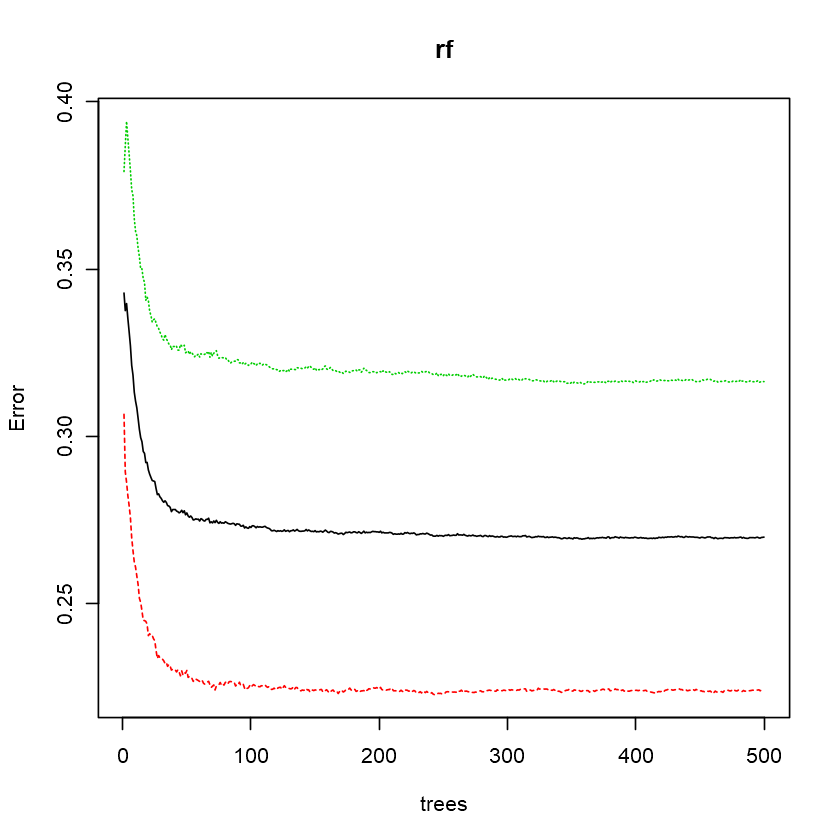

In [65]:
## Error rate for rf
plot(rf)

In an attempt to improve the accuracy of the random forest model, I had to look for the best parameters required to fit the model. The first step was to plot an error rate graph of the model. The aim of doing this is to find the best number of trees to have the lowest possible error rate. 
The graph reveals that the minimum best number of trees to get the lowest error rate possible is about 250.

mtry = 3  OOB error = 26.94% 
Searching left ...
mtry = 6 	OOB error = 28.5% 
-0.05776732 0.05 
Searching right ...
mtry = 1 	OOB error = 27.86% 
-0.03389375 0.05 


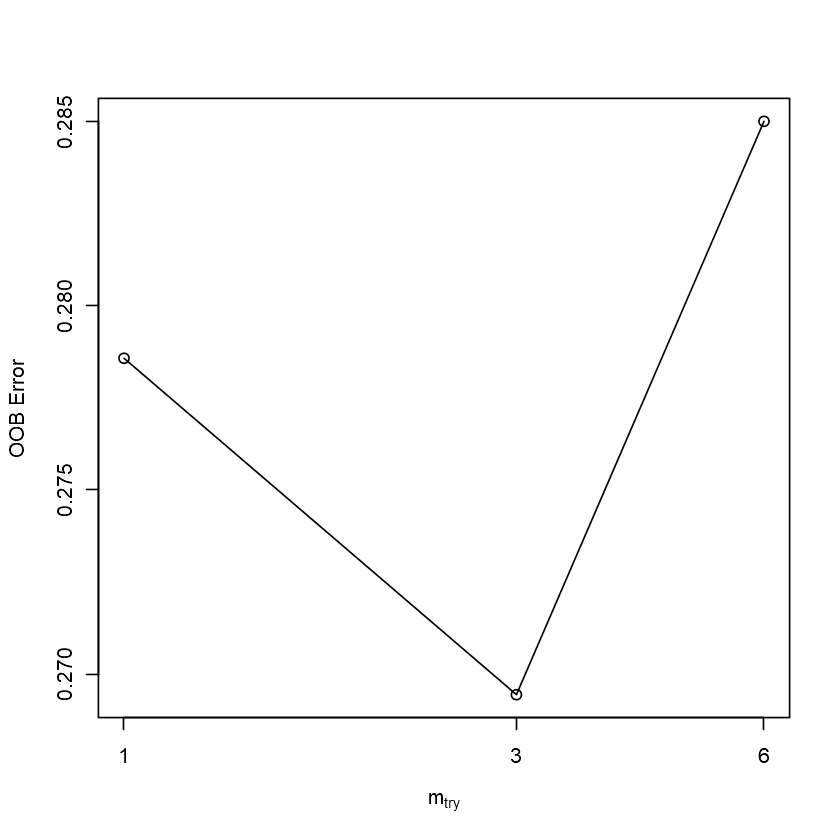

In [66]:
# Optimizing rf
## Tunning mtry to get the best possible mtry
t <-tuneRF(trainset[,-12], trainset$disease, stepFactor = 0.5, plot = TRUE, ntreeTry = 500, trace = TRUE, improve = 0.05)

The second attempt was to get the best possible number of variable at each split. The plot reveals that the best possible number of variable at each split is 3. Fortunately, the model automatically used this value in the model fitting process.

## 7.2 LOGISTIC REGRESSION
Logistics regression is a supervised classification algorithm used to predict a binary outcome. The input variables usually called independent variables can be continuous or discrete (ordinal or nominal). Logistic regression shares some similarities with the linear regression. However unlike linear regression, the response variable can be categorical or continuous. The major advantage of logistic regression is its speed, it is capable of processing large datasets in a short time when compared to other classification algorithms like SVM.

In [67]:
# Building classifier model with logistic regression
lr <- glm(disease~., data = trainset, family = 'binomial')

In [69]:
summary(lr)


Call:
glm(formula = disease ~ ., family = "binomial", data = trainset)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.6162  -0.9343  -0.3415   0.9469   3.5194  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -1.062e+01  2.625e-01 -40.474  < 2e-16 ***
age           1.450e-04  4.113e-06  35.251  < 2e-16 ***
gender2       3.162e-03  2.431e-02   0.130 0.896532    
height       -3.779e-03  1.413e-03  -2.674 0.007491 ** 
weight        1.161e-02  7.631e-04  15.213  < 2e-16 ***
ap_hi         4.657e-02  9.296e-04  50.097  < 2e-16 ***
ap_lo         2.121e-02  1.470e-03  14.430  < 2e-16 ***
cholesterol2  3.853e-01  3.017e-02  12.771  < 2e-16 ***
cholesterol3  1.092e+00  3.971e-02  27.494  < 2e-16 ***
gluc2         7.806e-03  3.990e-02   0.196 0.844873    
gluc3        -3.406e-01  4.384e-02  -7.768 7.95e-15 ***
smoke1       -1.927e-01  3.859e-02  -4.993 5.94e-07 ***
alco1        -1.625e-01  4.697e-02  -3.459 0.000542 ***
active1      -1

The summary function was used to produce some properties of the model. Values such as deviance residuals and coefficients were produce. The asterisk symbols indicate that the variables are statistically significant, the more the number of asterisks the more the statistical significance. The glm function handled categorical variables easily. As seen all categorical variables were dummified automatically. 

In [70]:
# Make predictions on lr model
lr_prob <- predict(lr, testset[-12], type = 'response')
head(lr_prob)

3        13        21        22        34        41 
0.7025262 0.2462278 0.4203970 0.5593716 0.6152299 0.2663588

In [71]:
## Setting threshold for prediction
lr_pred <- ifelse(lr_prob < 0.5, 0, 1)

The next step was to make predictions with the already built logistic model. This was done with the ‘predict’ function. The output of a logistic regression model prediction is usually probabilistic, hence an appropriate threshold needs to be set. I used a threshold of 0.5. I used an ‘ifelse’ function to classify values below 0.5 as false (0) and values greater than or equal to 0.5 as true (1).

In [72]:
## creating confusion matrix for lr model
confusionMatrix(factor(lr_pred), actual_y)

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 5476 2251
         1 1477 4593
                                          
               Accuracy : 0.7298          
                 95% CI : (0.7223, 0.7372)
    No Information Rate : 0.504           
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.4591          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.7876          
            Specificity : 0.6711          
         Pos Pred Value : 0.7087          
         Neg Pred Value : 0.7567          
             Prevalence : 0.5040          
         Detection Rate : 0.3969          
   Detection Prevalence : 0.5600          
      Balanced Accuracy : 0.7293          
                                          
       'Positive' Class : 0               
                        

## 7.3 GRADIENT BOOSTING
Gradient boosting is a technique for performing supervised machine learning tasks. It can be used for both classification and regression. Similar to random forest, it is an ensemble learner, in the sense that it creates a final model based on a collection of individual models. Individually, these models may produce poor accuracy but combining many such weak models in an ensemble will lead to an overall improved accuracy. 

In [73]:
# Building classifier model with XGBoost algorithm
## Prepare data for XGB model

In [74]:
## split data
trainset_x <- df[ind,]
testset_x <- df[-ind,]

In [75]:
## dummify factor variables and convert dataframe to matrix
trainm <- model.matrix(disease~., data = trainset_x)
testm <-  model.matrix(disease~., data = testset_x)

In [76]:
head(trainm)

,(Intercept),age,gender2,height,weight,ap_hi,ap_lo,cholesterol2,cholesterol3,gluc2,gluc3,smoke1,alco1,active1
41964,1,18177,1,169,72,125,80,0,0,0,0,1,0,1
15241,1,22923,0,171,72,140,80,0,0,0,0,0,0,1
33702,1,19039,1,168,73,130,80,1,0,0,0,0,0,0
68158,1,16802,1,158,50,90,60,0,0,0,0,0,0,1
59944,1,19681,0,175,80,120,80,0,0,0,0,0,0,1
68536,1,20393,1,170,78,110,80,1,0,1,0,0,0,1


In [77]:
## Get train labels
labels <- as.numeric(trainset$disease) -1

The processes involved in building a gradient boosting model is quite different from what we are used to.  For example the training and testing datasets had to be further processed into a matrix form so it can be interpreted by the XGBoost algorithm. The ’model.matrix’ function was used to carry out this task, this function was not only used to convert the dataset from a dataframe format to matrix format, it was also used to dummify categorical variables. 

In [78]:
install.packages('xgboost')
library(xgboost)

Installing package into 'C:/Users/Kelvin/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'xgboost' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Kelvin\AppData\Local\Temp\RtmpEbvy7c\downloaded_packages


Warning message:
"package 'xgboost' was built under R version 3.6.3"
Attaching package: 'xgboost'

The following object is masked from 'package:dplyr':

    slice



In [79]:
## Model building
xgb <- xgboost(data = trainm, label = labels, eta = 0.2, nrounds = 100, max_depth = 10, objective = "binary:logistic", verbose=0)

[16:11:12] WARNING: amalgamation/../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [80]:
## Probalistic prediction
xgb_prob <- predict(xgb, testm, type = "response")

In [81]:
## set threshold
xgb_pred <- ifelse(xgb_prob>0.5, 1, 0)

In [82]:
## confusion matrix for xgb
confusionMatrix(factor(xgb_pred), actual_y)

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 5363 2167
         1 1590 4677
                                          
               Accuracy : 0.7277          
                 95% CI : (0.7202, 0.7351)
    No Information Rate : 0.504           
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.455           
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.7713          
            Specificity : 0.6834          
         Pos Pred Value : 0.7122          
         Neg Pred Value : 0.7463          
             Prevalence : 0.5040          
         Detection Rate : 0.3887          
   Detection Prevalence : 0.5458          
      Balanced Accuracy : 0.7273          
                                          
       'Positive' Class : 0               
                        

The gradient boosting model was built using the xgboost function alongside other parameters like label, eta, nrounds, objective etc. The objective was set to ‘binary: logistic’, so that just like logistic regression, the classification is probabilistic. Finally, new dataset (test data) was used to test the newly built model and an accuracy of 72.77% was produced as seen.

In [83]:
head(df)

age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,disease
18393,2,168,62,110,80,1,1,0,0,1,0
20228,1,156,85,140,90,3,1,0,0,1,1
18857,1,165,64,130,70,3,1,0,0,0,1
17623,2,169,82,150,100,1,1,0,0,1,1
17474,1,156,56,100,60,1,1,0,0,0,0
21914,1,151,67,120,80,2,2,0,0,0,0


## 7.4 SUPPORT VECTOR MACHINE (SVM)
Support vector machine can be used for both classification and regression tasks but it is majorly used for classification. The SVM algorithm seeks to find a hyperplane in an N-dimensional space (where N is the number of variables) that distinctly classifies data points. SVM selects the hyperplane that has the maximum distance between data points of both classes. The hyperplane can be any dimension depending on the number of features involved. SVMs are non-probabilistic, i.e the classification is an absolute value.

In [84]:
## Prepare data for model
df_svm <- df
## Normalize data
df_svm[,c(1,3,4,5,6)] <- apply(df_svm[,c(1,3,4,5,6)], 2, norm)

In [85]:
## Split data 80:20
svm_train <- df_svm[ind,]
svm_test <- df_svm[-ind,]

In order to produce a high accuracy, further pre-processing needed to be carried out on the dataset. A function was created to normalize the data. Normalization is the process of changing the values of numeric variables in the dataset to a common scale without affecting the properties of the variables, such as variance etc. The type of normalization used is the min-max normalization. 

In [86]:
library(e1071)

Warning message:
"package 'e1071' was built under R version 3.6.3"
Attaching package: 'e1071'

The following objects are masked from 'package:PerformanceAnalytics':

    kurtosis, skewness



In [87]:
svmode <- svm(disease~., data = svm_train, kernel = 'radial')

In [88]:
summary(svmode)


Call:
svm(formula = disease ~ ., data = svm_train, kernel = "radial")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  32752

 ( 16331 16421 )


Number of Classes:  2 

Levels: 
 0 1




The SVM model was built using the ‘svm’ function and other attributes like the train dataset, appropriate variables and kernel type. After fitting the model, a summary was created for the model. The summary shows SVM-Type, SVM-Kernel and number of support vectors. Support vectors are the data points closest to the hyperplane.

In [89]:
svm_pred <- predict(svmode, newdata =svm_test[-12], type = "response")

In [90]:
## Get svm accurracy
confusionMatrix(svm_pred, actual_y)

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 5537 2248
         1 1416 4596
                                         
               Accuracy : 0.7344         
                 95% CI : (0.727, 0.7418)
    No Information Rate : 0.504          
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.4683         
                                         
 Mcnemar's Test P-Value : < 2.2e-16      
                                         
            Sensitivity : 0.7963         
            Specificity : 0.6715         
         Pos Pred Value : 0.7112         
         Neg Pred Value : 0.7645         
             Prevalence : 0.5040         
         Detection Rate : 0.4013         
   Detection Prevalence : 0.5643         
      Balanced Accuracy : 0.7339         
                                         
       'Positive' Class : 0              
                                         

Finally, the newly built model was used to make predictions using the test dataset. The confusion matrix created an impressive accuracy of 73.44%, a sensitivity of 79.63% and specificity of 67.15%.

In [ ]:
# Optimising svm model
## Hyper parameter optimisation
tmode <- tune(method = svm, disease ~., data = svm_train, ranges = list(epsilon = seq(0,1,0.1), cost = 2^(2:3)))

In [91]:
str(svm_train)

'data.frame':	55188 obs. of  12 variables:
 $ age        : num  0.571 0.939 0.638 0.465 0.688 ...
 $ gender     : Factor w/ 2 levels "1","2": 2 1 2 2 1 2 1 2 2 2 ...
 $ height     : num  0.585 0.595 0.579 0.528 0.615 ...
 $ weight     : num  0.323 0.323 0.328 0.206 0.365 ...
 $ ap_hi      : num  0.506 0.571 0.528 0.356 0.485 ...
 $ ap_lo      : num  0.533 0.533 0.533 0.4 0.533 ...
 $ cholesterol: Factor w/ 3 levels "1","2","3": 1 1 2 1 1 2 1 1 1 2 ...
 $ gluc       : Factor w/ 3 levels "1","2","3": 1 1 1 1 1 2 1 1 1 1 ...
 $ smoke      : Factor w/ 2 levels "0","1": 2 1 1 1 1 1 1 1 1 1 ...
 $ alco       : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ active     : Factor w/ 2 levels "0","1": 2 2 1 2 2 2 2 2 2 2 ...
 $ disease    : Factor w/ 2 levels "0","1": 1 2 2 1 2 1 2 1 2 2 ...


## 7.5 Neural Net

In [92]:
# Building classifier with Neural net
n_df <- df_back2

In [93]:
str(n_df)

'data.frame':	68985 obs. of  12 variables:
 $ age        : int  18393 20228 18857 17623 17474 21914 22113 22584 17668 19834 ...
 $ gender     : int  2 1 1 2 1 1 1 2 1 1 ...
 $ height     : int  168 156 165 169 156 151 157 178 158 164 ...
 $ weight     : num  62 85 64 82 56 67 93 95 71 68 ...
 $ ap_hi      : int  110 140 130 150 100 120 130 130 110 110 ...
 $ ap_lo      : int  80 90 70 100 60 80 80 90 70 60 ...
 $ cholesterol: int  1 3 3 1 1 2 3 3 1 1 ...
 $ gluc       : int  1 1 1 1 1 2 1 3 1 1 ...
 $ smoke      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ alco       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ active     : int  1 1 0 1 0 0 1 1 1 0 ...
 $ disease    : int  0 1 1 1 0 0 0 1 0 0 ...


In [94]:
## scale the dataset
n_df[,1:8] <- apply(n_df[,1:8], 2, norm)

In [95]:
str(n_df)

'data.frame':	68985 obs. of  12 variables:
 $ age        : num  0.588 0.73 0.624 0.528 0.517 ...
 $ gender     : num  1 0 0 1 0 0 0 1 0 0 ...
 $ height     : num  0.579 0.518 0.564 0.585 0.518 ...
 $ weight     : num  0.27 0.392 0.28 0.376 0.238 ...
 $ ap_hi      : num  0.442 0.571 0.528 0.614 0.399 ...
 $ ap_lo      : num  0.533 0.6 0.467 0.667 0.4 ...
 $ cholesterol: num  0 1 1 0 0 0.5 1 1 0 0 ...
 $ gluc       : num  0 0 0 0 0 0.5 0 1 0 0 ...
 $ smoke      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ alco       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ active     : int  1 1 0 1 0 0 1 1 1 0 ...
 $ disease    : int  0 1 1 1 0 0 0 1 0 0 ...


In [96]:
## Split data
n_train <- n_df[ind,]
n_test <- n_df[-ind,]

In [97]:
## Install neuralnet
install.packages('neuralnet')

Installing package into 'C:/Users/Kelvin/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'neuralnet' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Kelvin\AppData\Local\Temp\RtmpEbvy7c\downloaded_packages


In [98]:
library(neuralnet)

Warning message:
"package 'neuralnet' was built under R version 3.6.3"
Attaching package: 'neuralnet'

The following object is masked from 'package:dplyr':

    compute



In [99]:
## model
nnet <- neuralnet(disease~., data = n_train, hidden = 1, err.fct = 'ce', linear.output = FALSE) 

In [100]:
## make prediction
n_prob <- predict(nnet, n_test[-12])

In [101]:
n_pred <- ifelse(n_prob <0.5, 0,1)

In [102]:
## Get accuracy of nnet
confusionMatrix(factor(n_pred), actual_y)

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 5441 2200
         1 1512 4644
                                          
               Accuracy : 0.731           
                 95% CI : (0.7235, 0.7383)
    No Information Rate : 0.504           
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.4615          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.7825          
            Specificity : 0.6786          
         Pos Pred Value : 0.7121          
         Neg Pred Value : 0.7544          
             Prevalence : 0.5040          
         Detection Rate : 0.3944          
   Detection Prevalence : 0.5538          
      Balanced Accuracy : 0.7305          
                                          
       'Positive' Class : 0               
                        

## 7.6 K-Nearest Neighbour

In [124]:
# Building classifier with kNN
## Remove the labels from test

k_actual <- factor(n_test$disease)

In [125]:
install.packages('class')

Installing package into 'C:/Users/Kelvin/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



  There is a binary version available but the source version is later:
      binary source needs_compilation
class 7.3-17 7.3-18              TRUE

  Binaries will be installed


Warning message:
"package 'class' is in use and will not be installed"

In [126]:
library(class)

In [127]:
knn_mod <- knn(n_train[-12], n_test[-12], cl = factor(n_train$disease), k = 227) #square root of no of records in trainset

In [128]:
## Accuracy
confusionMatrix(knn_mod, actual_y)

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 5343 2288
         1 1610 4556
                                         
               Accuracy : 0.7175         
                 95% CI : (0.7099, 0.725)
    No Information Rate : 0.504          
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.4345         
                                         
 Mcnemar's Test P-Value : < 2.2e-16      
                                         
            Sensitivity : 0.7684         
            Specificity : 0.6657         
         Pos Pred Value : 0.7002         
         Neg Pred Value : 0.7389         
             Prevalence : 0.5040         
         Detection Rate : 0.3873         
   Detection Prevalence : 0.5531         
      Balanced Accuracy : 0.7171         
                                         
       'Positive' Class : 0              
                                         

# 8. MODEL EVALUATION

To pick the overall best model for our predictions, I decided not to rely on only accuracy as the metric of evaluation. I also tested another metric of evaluation called Mathews Correlation Coefficient (MCC). Accuracy on its own doesn’t show the discriminant ability of the model, it tends to favor the larger imbalanced class. The MCC is a measure of overall classifier quality, which measures the real-world “informedness” of a model, i.e. how effectively the model can make an informed decision.

In [129]:
install.packages('mccr')

Installing package into 'C:/Users/Kelvin/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'mccr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Kelvin\AppData\Local\Temp\RtmpEbvy7c\downloaded_packages


In [130]:
library(mccr)

Warning message:
"package 'mccr' was built under R version 3.6.3"

In [131]:
## MCC for SVM
mccr(svm_pred, actual_y)

[1] 0.4717811

In [132]:
mccr(factor(xgb_pred), actual_y) ##xgb

[1] 0.456597

In [133]:
mccr(factor(lr_pred), actual_y) #logistics

[1] 0.4620022

In [134]:
mccr(rf_pred, actual_y) #random forest

[1] 0.4696656

In [135]:
mccr(factor(n_pred), actual_y) # Neural Net

[1] 0.4637702

In [136]:
mccr(knn_mod, actual_y) # KNN

[1] 0.4365925

| Models | Accuracy | MCC |
| :- | :- | :- |
| Random Forest | 73.41% | 0.4696 |
| Logistic Regression | 72.98% | 0.4620 |
| SVM | 73.44% | 0.4717 |
| XGBoost | 72.77% | 0.4566 |
| Neural Net | 73.10% | 0.4637 |
| KNN | 71.75% | 0.4365 |

# 9. CONCLUSION
The SVM model performed the best judging with both accuracy and Mathews correlation coefficient. For implementation, the best model for consideration is the SVM. I believe a larger dataset and further parameter tuning will produce better overall quality of the model.